# SOK-1006 V23

## Arbeidskrav 3

### Frist fredag 10. februar kl 18.00 i Canvas

**Lever inn lenken til ditt repo på GitHub hvor løsningen ligger**. Individuell innlevering.

Se Jupyter notatblokk "Forsmak mappe 1" for et forslag til fremgangsmåte her, og kap 9 i boka. Samt forelesning 08.02.

Vi ser på markedet for oppdrettslaks på s. 101-104 i boka, og som vi har analysert i forelesning 5.      

Med en stykkavgift på $t$ kr per enhet pålagt selgere kan vi skrive etterspørsel og tilbud i (1) og (2):   


\begin{equation}
   x^{D}= 500 -3.2p\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3(p-t)\tag{2}
\end{equation}

1. Finn likevektspris og -kvantum for alle verdier av $t$.        
2. Finn uttrykk for konsument- og produsentoverskudd, samt avgiftproveny.           
2. Tegn likevekten for $t=0$ og fargelegg KO og PO.     
2. Tegn inn likevekten for $t=4$, og fargelegg avgiftproveny.      
4. Bruk de uttrykkene som du har laget for å fylle ut følgende tabell. NB det er mening at du skal fylle ut tabellen med uttrykk som du har regnet i koden (ikke skriv inn tall manuelt - se Forsmak mappe 1.ipynb).

|                     | Før avgift            |Etter avgift    | Endring (etter avgift-før avgift)|
| :-------------------| :----------------------------------------|:-------------|:---------------|
| Konsumentpris   |     | |  |
|Produsentpris  | |   |  |
|Kvantum  |  |   |    |
| Konsumentoverskudd: |  | |     |
| Produsentoverskudd: | |  |   |
| KO + PO:    |    | |  |
|Skatteproveny| 0  | | |
| Dødvektstap  |0   |   ||

In [1]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt

In [8]:
#Tilbud og etterspørselsfunksjoner
def x_demand(x):
    return ((500-x)/3.2)
def x_supply(x,t):
    return (x+100+4.3*t)/4.3

In [10]:
#Finner likevektspris og kvantum med symboler
x,p,t=sp.symbols('x p t', real=True, positive=True)
likev=sp.Eq(x_demand(x),x_supply(x,t))
likev

Eq(156.25 - 0.3125*x, 1.0*t + 0.232558139534884*x + 23.2558139534884)

In [13]:
#Tilbud og etterspørsel ved likevekt
eq_demand=sp.Eq(p,x_demand(x))
eq_supply=sp.Eq(p,x_supply(x,t))

In [12]:
sol_dict=sp.solve ((eq_demand, eq_supply), (p,x))
sol_dict

{p: 0.573333333333333*t + 80.0, x: 244.0 - 1.83466666666667*t}

In [15]:
#Likevektsprisen
display(sol_dict[p]) 

0.573333333333333*t + 80.0

In [14]:
#Likevektskvantum
display(sol_dict[x])

244.0 - 1.83466666666667*t

In [16]:
x_eq=sp.lambdify((t), sol_dict[x])
x_eq(t)

244.0 - 1.83466666666667*t

In [18]:
p_eq=sp.lambdify((t),sol_dict[p])
p_eq(t)

0.573333333333333*t + 80.0

In [20]:
#Producer surplus, produsentoverskudd
producer_surplus=sp.integrate(x_eq(t)-x_supply(x,t),
                              (x,0,p_eq(t)))
producer_surplus 

(220.744186046512 - 2.83466666666667*t)*(0.573333333333333*t + 80.0) - 744.186046511628*(0.00716666666666666*t + 1)**2

In [23]:
#Produsentoverskudd når t = 0
producer_surplus_0=sp.integrate(x_eq(0)-x_supply(x,0),
                              (x,0,p_eq(0)))
producer_surplus_0

16915.3488372093

In [25]:
#Produsentoverskudd når t = 4
producer_surplus_4=sp.integrate(x_eq(4)-x_supply(x,0),(x,0,p_eq(4)))
producer_surplus_4

16774.3872727649

In [47]:
#Konsumentoverskudd
consumer_surplus_0=sp.integrate(x_demand(x)-x_eq(0),
                              (x,0,p_eq(0)))
consumer_surplus_0

-8020.00000000000

In [48]:
consumer_surplus_4=sp.integrate(x_demand(x)-x_eq(4),
                                (x,0,p_eq(4)))
consumer_surplus_4

-7675.47176888889

In [29]:
#Samfunnsøkonomisk overskudd = Produsentoverskudd + Konsumentoverskudd
welfare_surplus=sp.simplify(sp.integrate(x_demand(x)-x_supply(x,t),
                                         (x,0,p_eq(t))))
welfare_surplus 

-0.662916666666666*t**2 - 28.75*t + 8895.3488372093

In [45]:
#Samfunnsøkonomisk overskudd når t = 0
welfare_surplus_0=sp.integrate(x_demand(x)-x_supply(x,0),
                             (x,0,p_eq(0)))
welfare_surplus_0

8895.34883720930

In [46]:
welfare_surplus_4=sp.integrate(x_demand(x)-x_supply(x,4),
                             (x,0,p_eq(4)))
welfare_surplus_4

8769.74217054263

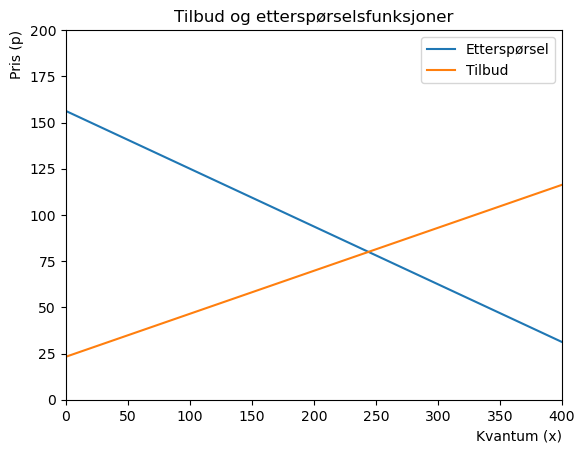

In [37]:
#Plotter tilbud og etterspørselfunksjonene
x_num=np.linspace(0.1,500,400)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris (p)', loc='top')
                ax.set_xlabel('Kvantum (x)', loc='right')
                ax.set(xlim=(0,400))
                ax.set(ylim=(0,200))
                
                return fig, ax

fig, ax = create_ax()

ax.plot(x_num, x_demand(x_num), label='Etterspørsel')
ax.plot(x_num, x_supply(x_num,0), label='Tilbud')

ax.set_title('Tilbud og etterspørselsfunksjoner')
ax.legend();

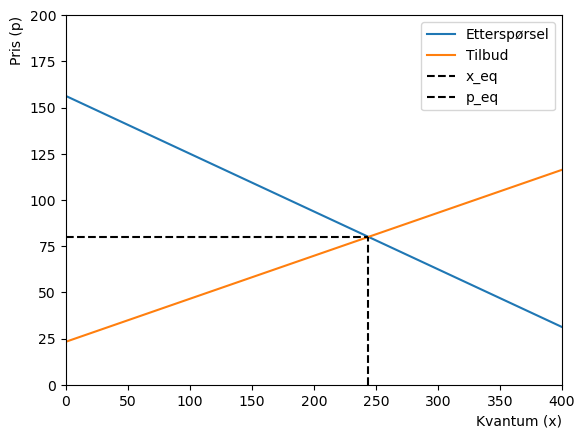

In [39]:
q = np.linspace(0,x_eq(0),300)

fig, ax = create_ax()
ax.plot(x_num, x_demand(x_num), label='Etterspørsel')
ax.plot(x_num, x_supply(x_num,0), label='Tilbud')

ax.vlines(x_eq(0),0,x_demand(x_eq(0)),
          color='black',
          ls='dashed',
          label='x_eq')
ax.hlines(p_eq(0),0,x_eq(0),
          color='black',
          ls='dashed',
          label='p_eq')
ax.legend();

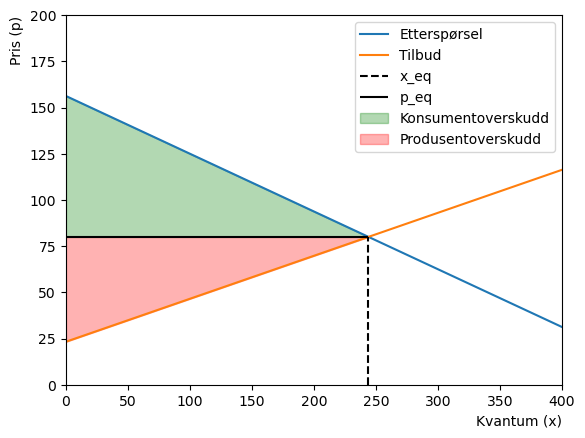

In [ ]:
q=np.linspace(0,244,200)
fig, ax = create_ax()

ax.plot(x_num, x_demand(x_num),
        label='Etterspørsel')
ax.plot(x_num, x_supply(x_num,0),
        label='Tilbud')

ax.vlines(244,0,80,
          color='black',
          ls='dashed', 
          label='x_eq')
ax.hlines(80,0,244,
          color='black',
          label='p_eq')

#Fill_between for å fargelegge produsent og konsumentoverskudd
ax.fill_between(q,80,x_demand(q),
                color = "green",
                alpha = 0.3,
                label='Konsumentoverskudd')
ax.fill_between(q,x_supply(q,0),
                80, color = "red",
                alpha = 0.3,
                label='Produsentoverskudd')
ax.legend();

In [50]:
#Oppgave 5
from IPython.display import Markdown

tbl=f"""
|                     | Før avgift               | Etter avgift               | Endring(Etter avgift - Før avgift)      |
| :-------------------| :------------------------| :---------------------------| :----------------------------------------|
| Produsentpris:      | ${0}$                    | ${(4)}$                     | ${((4))}$  |
| Konsumentpris:      | ${p_eq(0)}$              | ${(p_eq(4))}$               | ${((p_eq(4)-p_eq(0)))}$  |
| Kvantum:            | ${x_eq(0)}$              | ${x_eq(4)}$                 | ${(x_eq(4)-x_eq(0))}$    |
| Konsumentoverskudd: | ${consumer_surplus_0}$    | ${consumer_surplus_4}$        | ${(consumer_surplus_0-consumer_surplus_4)}$ |
| Produsentoverskudd: | ${producer_surplus_0}$    | ${producer_surplus_4}$        | ${(producer_surplus_0-producer_surplus_4)}$ |
| KO + PO:            | ${welfare_surplus_0}$     | ${welfare_surplus_4}$         | ${((welfare_surplus_0-welfare_surplus_4))}$ |
| Skatteproveny:      | ${0}$|${((welfare_surplus_0-welfare_surplus_4))}$| ${(welfare_surplus_4-welfare_surplus_0)}$ |
| Dødvektstap :       | ${0}$| ${((17*(x_eq(4)-x_eq(0)))/2)}$        | ${((17*(x_eq(4)-x_eq(0)))/2-0)}$   |
"""
display(Markdown(tbl))


|                     | Før avgift               | Etter avgift               | Endring(Etter avgift - Før avgift)      |
| :-------------------| :------------------------| :---------------------------| :----------------------------------------|
| Produsentpris:      | $0$                    | $4$                     | $4$  |
| Konsumentpris:      | $80.0$              | $82.29333333333334$               | $2.2933333333333366$  |
| Kvantum:            | $244.0$              | $236.66133333333332$                 | $-7.338666666666683$    |
| Konsumentoverskudd: | $-8020.00000000000$    | $-7675.47176888889$        | $-344.528231111112$ |
| Produsentoverskudd: | $16915.3488372093$    | $16774.3872727649$        | $140.961564444446$ |
| KO + PO:            | $8895.34883720930$     | $8769.74217054263$         | $125.606666666668$ |
| Skatteproveny:      | $0$|$125.606666666668$| $-125.606666666668$ |
| Dødvektstap :       | $0$| $-62.3786666666668$        | $-62.3786666666668$   |
